課題: 正弦波をNNとRNNで学習


## NNで正弦波を予測

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

学習データの用意

10000 10000


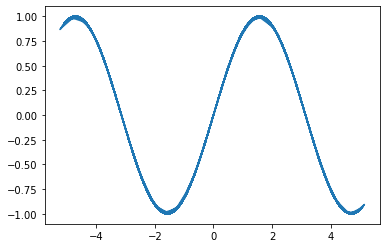

In [ ]:
x = np.arange(-5, 5, 0.001).astype(np.float32)

noise = 0.1 * np.random.randn(len(x)) # ノイズ生成
x += noise

y = np.sin(x)

print(len(x), len(y))

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

NNモデルの構築

In [ ]:
actfunc = 'softmax'
#活性化関数

model = Sequential()
model.add(Dense(1, activation=actfunc, input_dim=1))
model.add(Dense(1, activation=actfunc))
model.add(Dense(1))

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1),
    loss='mean_squared_error'
)

history = model.fit(x, y,
                    validation_split=0.2, # 検証用データの割合
                    batch_size=1,
                    epochs=10,
                    verbose=1)

Epoch 1/10
8000/8000 [==============================] - 12s 1ms/step - loss: 1.0199 - val_loss: 4.1332
Epoch 2/10
8000/8000 [==============================] - 12s 1ms/step - loss: 1.0131 - val_loss: 0.1520
Epoch 3/10
8000/8000 [==============================] - 13s 2ms/step - loss: 1.0353 - val_loss: 0.2586
Epoch 4/10
8000/8000 [==============================] - 12s 1ms/step - loss: 1.0174 - val_loss: 0.5980
Epoch 5/10
8000/8000 [==============================] - 12s 1ms/step - loss: 0.9626 - val_loss: 0.3295
Epoch 6/10
8000/8000 [==============================] - 13s 2ms/step - loss: 1.0294 - val_loss: 1.1310
Epoch 7/10
8000/8000 [==============================] - 13s 2ms/step - loss: 1.0356 - val_loss: 0.1357
Epoch 8/10
8000/8000 [==============================] - 13s 2ms/step - loss: 0.9882 - val_loss: 2.7364
Epoch 9/10
8000/8000 [==============================] - 12s 1ms/step - loss: 1.0074 - val_loss: 1.8906
Epoch 10/10
8000/8000 [==============================] - 13s 2ms/step - l

学習曲線

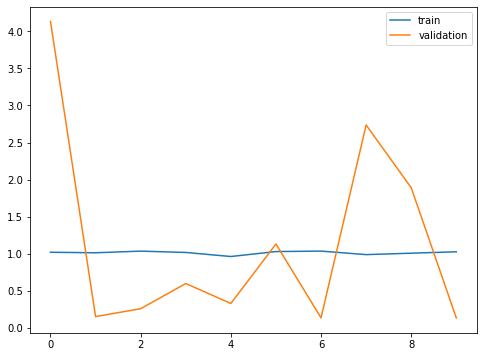

In [ ]:
train_loss = history.history["loss"]
val_loss = history.history['val_loss']

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_loss, label="train")
ax.plot(val_loss, label="validation")
plt.legend()
plt.show()

## 評価

テストデータ用意

10000 10000


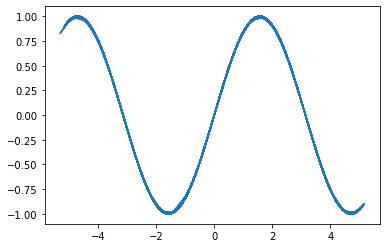

In [ ]:
xtest = np.arange(-5, 5, 0.001).astype(np.float32)

noise = 0.1 * np.random.randn(len(xtest)) # ノイズ生成
xtest += noise

ytest = np.sin(xtest)

print(len(xtest), len(ytest))

fig, ax = plt.subplots()
ax.plot(xtest, ytest)
plt.show()

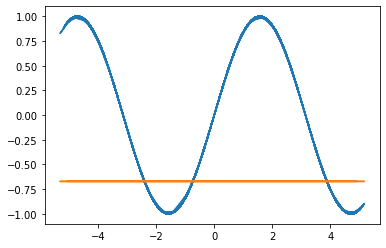

In [ ]:
pred = model.predict(xtest)

fig, ax = plt.subplots()
ax.plot(xtest, ytest)
ax.plot(xtest, pred)
plt.show()

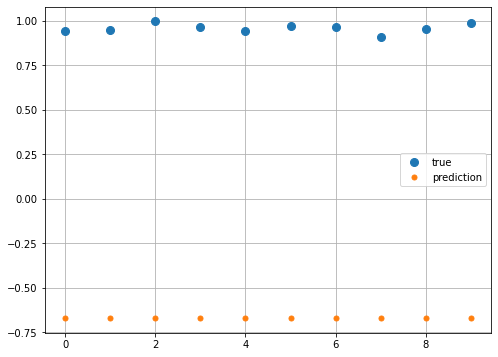

In [ ]:
pred = model.predict(xtest)

fig, ax = plt.subplots(figsize=(8, 6))

# テストデータ
ax.plot(ytest[:10], linewidth=0, marker="o", markersize=8)
ax.plot(pred[:10], linewidth=0, marker="o", markersize=5)

ax.legend(["true", "prediction"])
ax.grid()
plt.show()

## RNNで予測

Kerasの実装済みRecurrent（再帰）レイヤを使う


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

学習データの可視化

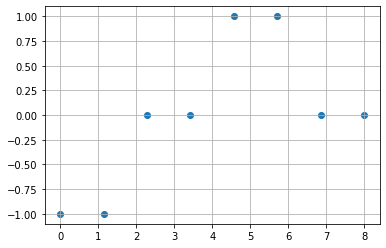

In [ ]:
timesteps = 5 # 過去の情報

x_base = np.array([-1,-1,0,0,1,1,0,0], dtype=np.float32)

x_visual = np.linspace(0, len(x_base), len(x_base))
plt.scatter(x_visual, x_base)
plt.grid()
plt.show()

In [ ]:
x = np.empty(0, dtype=np.float32)

for _ in range(1000):
    x = np.hstack([x, x_base]) # 最大軸で結合していく
print(x.shape)

(8000,)


## 学習データの生成
参考: [Kerasを使ったRNN, GRU, LSTMによる時系列予測](https://helve-blog.com/posts/python/keras-recurrent-neural-network/)

In [ ]:
xdata = np.array([x[i:i+timesteps] for i in range(len(x)-timesteps)])
noise = 0.1 * np.random.randn(len(xdata), timesteps) # ノイズの生成
xdata += noise

xdata = xdata.reshape(xdata.shape[0], timesteps, -1) # 3次元配列に変換
print("学習データ: ", xdata.shape)

ydata = x[timesteps:].reshape(xdata.shape[0], -1)
print("ラベル: ", ydata.shape)

学習データ:  (7995, 5, 1)
ラベル:  (7995, 1)


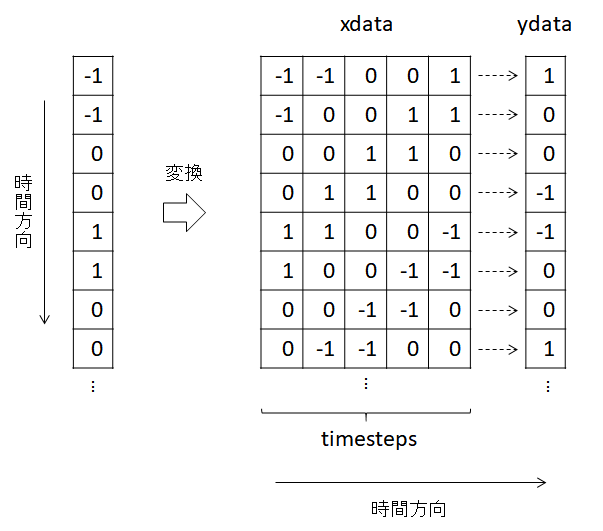

テストデータ生成


In [ ]:
x = np.empty(0, dtype=np.float32)

for _ in range(100):
    x = np.hstack([x, x_base])
print(x.shape)

xtest = np.array([x[i:i+timesteps] for i in range(len(x)-timesteps)])
noise = 0.1 * np.random.randn(len(xtest), timesteps)
xtest += noise

xtest = xtest.reshape(xtest.shape[0], timesteps, -1)
print("テストデータ: ", xtest.shape)

ytest = x[timesteps:].reshape(xtest.shape[0], -1)
print("テストラベル: ", ytest.shape)

(800,)
テストデータ:  (795, 5, 1)
テストラベル:  (795, 1)


## 学習

In [ ]:
actfunc = "tanh"

model = Sequential()
model.add(SimpleRNN(1, activation=actfunc, batch_input_shape=(None, timesteps, 1)))
model.add(Dense(1, activation=actfunc))
model.add(Dense(1))

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1),
    loss='mean_squared_error'
)

history = model.fit(xdata, ydata,
                    validation_split=0.2,
                    batch_size=1,
                    epochs=10,
                    verbose=1)

Epoch 1/10
7195/7195 [==============================] - 16s 2ms/step - loss: 1.3267 - val_loss: 0.5370
Epoch 2/10
7195/7195 [==============================] - 15s 2ms/step - loss: 1.3685 - val_loss: 0.7028
Epoch 3/10
7195/7195 [==============================] - 15s 2ms/step - loss: 1.3968 - val_loss: 0.6009
Epoch 4/10
7195/7195 [==============================] - 15s 2ms/step - loss: 1.2401 - val_loss: 1.3717
Epoch 5/10
7195/7195 [==============================] - 15s 2ms/step - loss: 1.2994 - val_loss: 1.6252
Epoch 6/10
7195/7195 [==============================] - 15s 2ms/step - loss: 1.2850 - val_loss: 2.6329
Epoch 7/10
7195/7195 [==============================] - 15s 2ms/step - loss: 1.3518 - val_loss: 1.3947
Epoch 8/10
7195/7195 [==============================] - 15s 2ms/step - loss: 1.3365 - val_loss: 0.8253
Epoch 9/10
7195/7195 [==============================] - 15s 2ms/step - loss: 1.2704 - val_loss: 0.5506
Epoch 10/10
7195/7195 [==============================] - 15s 2ms/step - l

学習曲線

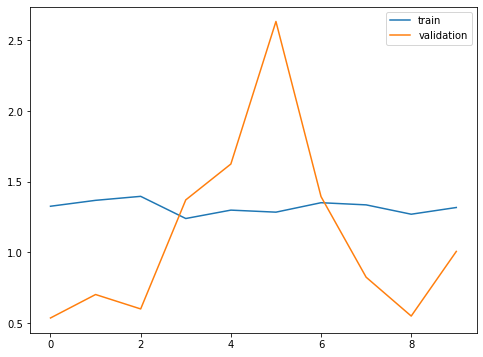

In [ ]:
train_loss = history.history["loss"]
val_loss = history.history['val_loss']

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_loss, label="train")
ax.plot(val_loss, label="validation")
plt.legend()
plt.show()

## 評価

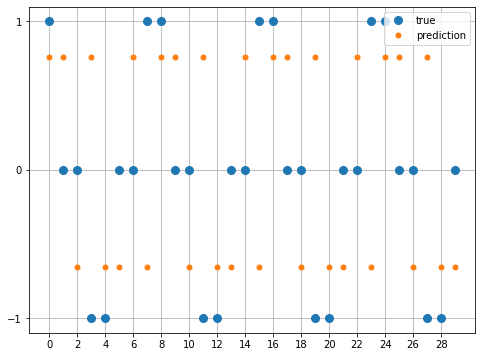

In [ ]:
pred = model.predict(xtest)

fig, ax = plt.subplots(figsize=(8, 6))

# テストデータ
ax.plot(ytest[:30, :].reshape(-1), linewidth=0, marker="o", markersize=8)
ax.plot(pred[:30, :].reshape(-1), linewidth=0, marker="o", markersize=5)
ax.set_xticks(np.arange(0, 30, 2))
ax.set_yticks([-1, 0, 1])
ax.legend(["true", "prediction"])
ax.grid()
plt.show()